<a href="https://colab.research.google.com/github/kalra20/BrainSight_Assignment/blob/main/Assignment_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip3 install nilearn
!pip3 install nipype

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import nibabel as nib
import matplotlib.pyplot as plt
import time
import json
%matplotlib inline
from nilearn.decomposition import CanICA
import nipype as nip
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_path = f'/content/drive/MyDrive/BrainAI/MRI scan'
data_dirs = os.listdir(data_path)
print(data_dirs)

['Filtered_4DVolume.nii']


In [5]:

nib_file = nib.load(data_path+'/Filtered_4DVolume.nii')
arr = np.array(nib.load(data_path+'/Filtered_4DVolume.nii').dataobj)
arr.shape

(61, 73, 61, 143)

In [67]:
canica = CanICA(n_components=4,
                memory="nilearn_cache", memory_level=2,
                verbose=10,
                mask_strategy='template',
                random_state=0)
canica.fit(nib_file)


[MultiNiftiMasker.fit] Loading data from [Nifti1Image('/content/drive/MyDrive/BrainAI/MRI scan/Filtered_4DVolume.nii')]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[Memory]0.0s, 0.0min    : Loading randomized_svd from nilearn_cache/joblib/sklearn/utils/extmath/randomized_svd/0e6c81ea63233e011044b66476e829b8
______________________________________randomized_svd cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/57c747a9d0f6d7f8a21831684f2cb70d
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/d2cfeb931bfd2255fdf131144299fbf6
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]0.0s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/nilearn/image/image.py:1057: FutureWarning: The parameter "sessions" will be removed in 0.

CanICA(detrend=True, do_cca=True, high_pass=None, low_pass=None, mask=None,
       mask_args=None, mask_strategy='template',
       memory=Memory(location=nilearn_cache/joblib), memory_level=2,
       n_components=4, n_init=10, n_jobs=1, random_state=0, smoothing_fwhm=6,
       standardize=True, standardize_confounds=True, t_r=None,
       target_affine=None, target_shape=None, threshold='auto', verbose=10)

In [22]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

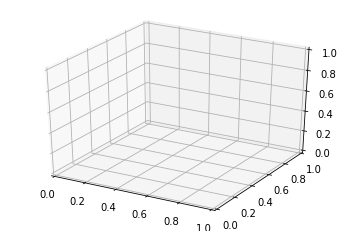

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')


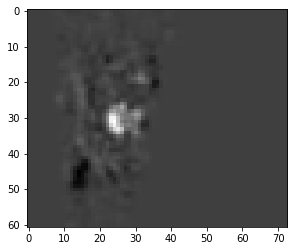

In [30]:
from matplotlib import cm
img = arr[:,:,0,0]
# plt.plot(img)
plt.imshow(img,cmap=cm.gray)

In [61]:
canica_components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
canica_components_img.to_filename('canica_resting_state.nii.gz')

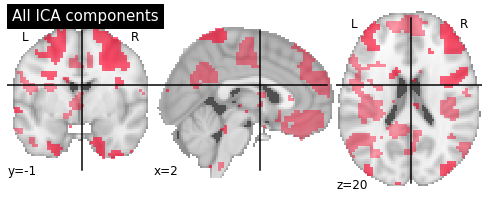

In [75]:
from nilearn.plotting import plot_prob_atlas
canica_components_img_dmn = []
for i, cur_img in enumerate(iter_img(canica_components_img)):
    if i == 2 :
      canica_components_img_dmn.append(cur_img)
# Plot all ICA components together
plot_prob_atlas(canica_components_img_dmn, title='All ICA components')


/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays.py:1751: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fraction * (x1 - x0), y1 - y0])


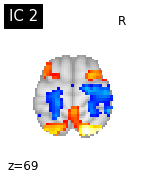

In [76]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(canica_components_img)):
    if i == 2:
      plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)
# plot_stat_map(iter_img(canica_components_img)[0], display_mode="z", title="IC %d" % i,
#                   cut_coords=1, colorbar=False)